# Natural Language Processing (NLP)

spaCy is a free open-source library for Natural Language Processing (NLP) in Python, featuring NER, POS and more.

The name spaCy comes from spaces + Cython, as spaCy started off as a solution for tokenization - and potentially more. Cython allows spaCy to be incredibly fast.

It has trainable, or in other words customizable and extendable models for most of these tasks - while providing some really good models out of the box.

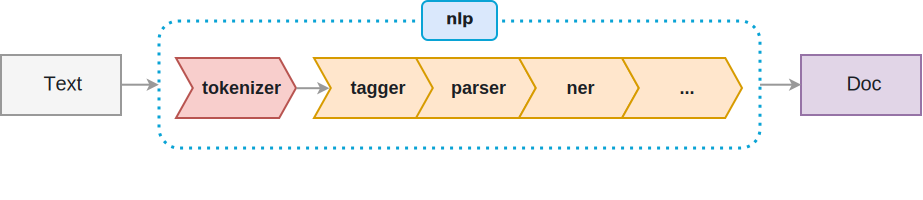

In [35]:
%%svg
<svg class="o-svg" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 923 200" width="923" height="200">
    <style>
        .svg__pipeline__text { fill: #1a1e23; font: 20px Arial, sans-serif }
        .svg__pipeline__text-small { fill: #1a1e23; font: bold 18px Arial, sans-serif }
        .svg__pipeline__text-code { fill: #1a1e23; font: 600 16px Menlo, Monaco, Consolas, "Liberation Mono", "Courier New", monospace }
    </style>
    <rect width="601" height="127" x="159" y="21" fill="none" stroke="#09a3d5" stroke-width="3" rx="19.1" stroke-dasharray="3 6" ry="19.1"/>
    <path fill="#e1d5e7" stroke="#9673a6" stroke-width="2" d="M801 55h120v60H801z"/>
    <text class="svg__pipeline__text" dy="0.75em" width="28" height="19" transform="translate(846.5 75.5)">Doc</text>
    <path fill="none" stroke="#999" stroke-width="2" stroke-miterlimit="10" d="M121.2 84.7h29.4"/>
    <path fill="#999" stroke="#999" stroke-width="2" stroke-miterlimit="10" d="M156.6 84.7l-8 4 2-4-2-4z"/>
    <path fill="#f5f5f5" stroke="#999" stroke-width="2" d="M1 55h120v60H1z"/>
    <text class="svg__pipeline__text" dy="0.85em" width="34" height="22" transform="translate(43.5 73.5)">Text</text>
    <path fill="none" stroke="#999" stroke-width="2" stroke-miterlimit="10" d="M760 84.7h33"/>
    <path fill="#999" stroke="#999" stroke-width="2" stroke-miterlimit="10" d="M799 84.7l-8 4 2-4-2-4z"/>
    <rect width="75" height="39" x="422" y="1" fill="#dae8fc" stroke="#09a3d5" stroke-width="2" rx="5.8" ry="5.8"/>
    <text class="svg__pipeline__text-code" dy="0.8em" dx="0.1em" width="29" height="17" transform="translate(444.5 11.5)">nlp</text>
    <path fill="#f8cecc" stroke="#b85450" stroke-width="2" stroke-miterlimit="10" d="M176 58h103.3L296 88l-16.8 30H176l16.8-30z"/>
    <text class="svg__pipeline__text-small" dy="0.75em" dx="-0.25em" width="58" height="14" transform="translate(206.5 80.5)">tokenizer</text>
    <path fill="#ffe6cc" stroke="#d79b00" stroke-width="2" stroke-miterlimit="10" d="M314 58h103.3L434 88l-16.8 30H314l16.8-30z"/>
    <text class="svg__pipeline__text-small" dy="0.75em" dx="8" width="62" height="14" transform="translate(342.5 80.5)">tagger</text>
    <path fill="none" stroke="#999" stroke-width="2" stroke-miterlimit="10" d="M296.5 88.2h24.7"/>
    <path fill="#999" stroke="#999" stroke-width="2" stroke-miterlimit="10" d="M327.2 88.2l-8 4 2-4-2-4z"/>
    <path fill="#ffe6cc" stroke="#d79b00" stroke-width="2" stroke-miterlimit="10" d="M416 58h103.3L536 88l-16.8 30H416l16.8-30z"/>
    <text class="svg__pipeline__text-small" dy="0.75em" dx="-0.25em" width="40" height="14" transform="translate(455.5 80.5)">parser</text>
    <path fill="#ffe6cc" stroke="#d79b00" stroke-width="2" stroke-miterlimit="10" d="M519 58h103.3L639 88l-16.8 30H519l16.8-30z"/>
    <text class="svg__pipeline__text-small" dy="0.75em" dx="8" width="40" height="14" transform="translate(558.5 80.5)">ner</text>
    <path fill="#ffe6cc" stroke="#d79b00" stroke-width="2" stroke-miterlimit="10" d="M622 58h103.3L742 88l-16.8 30H622l16.8-30z"/>
    <text class="svg__pipeline__text-small" dy="0.75em" dx="8" width="20" height="14" transform="translate(671.5 80.5)">...</text>
</svg>

In [7]:
%%capture
import sys
!{sys.executable} -m pip install panda
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download de
!{sys.executable} -m spacy download de_news_web_sm
!{sys.executable} -m spacy download en
!{sys.executable} -m spacy download en_core_web_sm

## 1. Vers im Alten Testament (deutsch) / Dependency Parsing

In [36]:
import spacy

de_nlp = spacy.load('de')

de_doc = de_nlp(u'Am Anfang schuf Gott Himmel und Erde.')

spacy.displacy.render(de_doc, style='dep', jupyter=True)

## 1. Vers im Alten Testament (deutsch) / Named Entity Recognition (NER)

In [37]:
import spacy

de_nlp = spacy.load('de')

de_doc = de_nlp(u'Am Anfang schuf Gott Himmel und Erde.')

spacy.displacy.render(de_doc, style='ent', jupyter=True)

## Spacy / 1. Vers im Alten Testament (deutsch) / Lemmatization

In [38]:
import pandas
import spacy
import tabulate

de_nlp = spacy.load('de')

de_doc = de_nlp(u'Am Anfang schuf Gott Himmel und Erde.')

df = pandas.DataFrame([[t.text, t.lemma_, t.pos_] for t in de_doc],columns=['text', 'lemma', 'pos'])

print(tabulate.tabulate(df, headers='keys', tablefmt='psql'))

+----+--------+----------+-------+
|    | text   | lemma    | pos   |
|----+--------+----------+-------|
|  0 | Am     | Am       | ADP   |
|  1 | Anfang | Anfang   | NOUN  |
|  2 | schuf  | schaffen | VERB  |
|  3 | Gott   | Gott     | NOUN  |
|  4 | Himmel | himmeln  | NOUN  |
|  5 | und    | und      | CONJ  |
|  6 | Erde   | erden    | NOUN  |
|  7 | .      | .        | PUNCT |
+----+--------+----------+-------+


## Spacy / Machinenbau (englisch) / Dependency Parsing

In [39]:
import spacy

en_nlp = spacy.load('en_core_web_sm')

en_doc = en_nlp(u'\
Switchgear links generators, transporters, and consumers, such as motors and gears. \
')

options = {'compact': True, 'font': 'Source Sans Pro'}

spacy.displacy.render(en_doc, style='dep', options=options, jupyter=True)

In [12]:
import pandas
import tabulate

df = pandas.DataFrame(
    [[t.text, t.lemma_, t.pos_, t.is_stop] for t in en_doc],
    columns=['text', 'lemma', 'pos', 'stop'])

print(tabulate.tabulate(df, headers='keys', tablefmt='psql'))

+----+--------------+-------------+-------+--------+
|    | text         | lemma       | pos   | stop   |
|----+--------------+-------------+-------+--------|
|  0 | Switchgear   | switchgear  | NOUN  | False  |
|  1 | links        | link        | VERB  | False  |
|  2 | generators   | generator   | NOUN  | False  |
|  3 | ,            | ,           | PUNCT | False  |
|  4 | transporters | transporter | NOUN  | False  |
|  5 | ,            | ,           | PUNCT | False  |
|  6 | and          | and         | CCONJ | True   |
|  7 | consumers    | consumer    | NOUN  | False  |
|  8 | ,            | ,           | PUNCT | False  |
|  9 | such         | such        | ADJ   | True   |
| 10 | as           | as          | ADP   | True   |
| 11 | motors       | motor       | NOUN  | False  |
| 12 | and          | and         | CCONJ | True   |
| 13 | gears        | gear        | NOUN  | False  |
| 14 | .            | .           | PUNCT | False  |
+----+--------------+-------------+-------+---

In [59]:
import spacy

nlp = spacy.load('en_core_web_sm')

doc = nlp(u'Switchgear links generators, transporters, and consumers, such as motors and gears.')

for sent in doc.sents:
    pos = {
        'text':  sent.text,
        'ents':  [{'start': token.idx,'end': token.idx+len(token), 'label': token.pos_} for token in sent],
        'title': None
    }

spacy.displacy.render(pos, style='ent', manual=True, jupyter=True)